In [5]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import pickle
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.io import output_notebook 
output_notebook

<function bokeh.io.output.output_notebook(resources: 'Resources | None' = None, verbose: 'bool' = False, hide_banner: 'bool' = False, load_timeout: 'int' = 5000, notebook_type: 'NotebookType' = 'jupyter') -> 'None'>

## Загрузка и знакомство с данными

In [6]:
df = pd.read_csv('../LR1_IIS/data/car data.csv')
display(df.head(10))

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Очистка данных 

In [7]:
## Что лежит в ячейкках 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df['Car_Name']= df['Car_Name'].astype('category')
df['Fuel_type']= df['Fuel_Type'].astype('category')
df['Transmission']= df['Transmission'].astype('category')
df['Selling_type']= df['Selling_type'].astype('category')


In [9]:
df['Year']= df['Year'].astype('int16')
df['Selling_Price']= df['Selling_Price'].astype('float16')
df['Present_Price']= df['Present_Price'].astype('float16')
df['Owner']= df['Owner'].astype('int16')
df['Driven_kms']= df['Driven_kms'].astype('int16')


In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    int16   
 2   Selling_Price  301 non-null    float16 
 3   Present_Price  301 non-null    float16 
 4   Driven_kms     301 non-null    int16   
 5   Fuel_Type      301 non-null    object  
 6   Selling_type   301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int16   
 9   Fuel_type      301 non-null    category
dtypes: category(4), float16(2), int16(3), object(1)
memory usage: 9.8+ KB


In [11]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Car_Name', 'Selling_type', 'Transmission', 'Fuel_type']

In [12]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.660156,7.628906,1239.883721,0.043189
std,2.891554,5.082031,8.648438,19150.260089,0.247915
min,2003.000000,0.099976,0.320068,-32536.000000,0.000000
25%,2012.000000,0.899902,1.200195,-16536.000000,0.000000
50%,2014.000000,3.599609,6.398438,5000.000000,0.000000
75%,2016.000000,6.000000,9.898438,16500.000000,0.000000
max,2018.000000,35.000000,92.625000,32322.000000,3.000000


In [14]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Car_Name: Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Passion X pro         1
Hero Hunk                  1
camry                      1
Hero Honda Passion Pro     1
800                        1
Name: count, Length: 98, dtype: int64
Unique categories in Selling_type: Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Unique categories in Fuel_type: Fuel_type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


## Очистка данных 

In [15]:
## Очистка данных не требуется 

## Анализ признаков для модели 

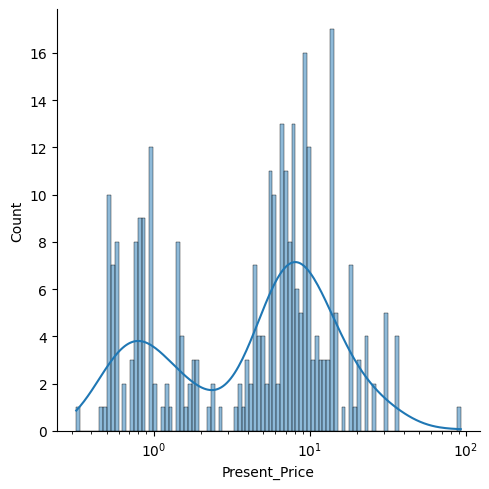

In [16]:
fig = sns.displot(df, x='Present_Price', bins=100,  kde=True, log_scale=True)
fig.savefig("presprice.png")

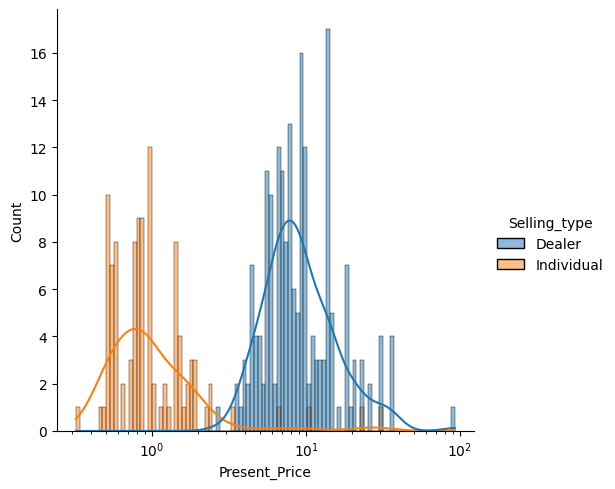

In [17]:
fig = sns.displot(df, x='Present_Price', bins=100, hue= 'Selling_type', kde=True, log_scale=True)
fig.savefig("prespricetoselling.png")

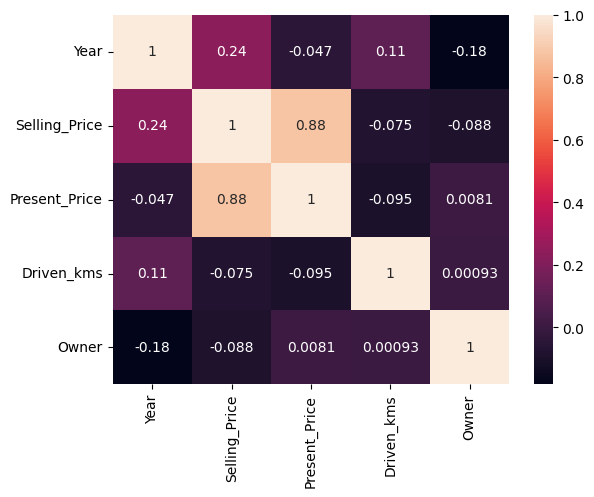

In [18]:
feature_correlation = df[num_features].corr()
fig = sns.heatmap(feature_correlation, annot=True)
figure = fig.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

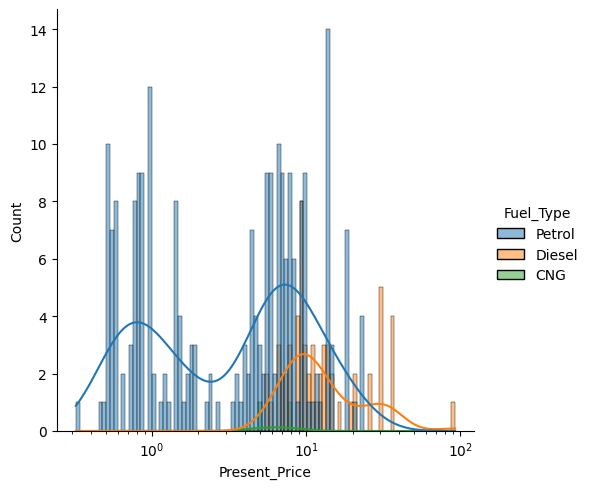

In [19]:
fig = sns.displot(df, x='Present_Price', bins=100, hue= 'Fuel_Type', kde=True, log_scale=True)
fig.savefig("out.png")

In [22]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file

# Создание фигуры
p = figure(width=1000)

# Пример источника данных (замени на свои данные)
source = {"Year": [2020, 2021], "Present_price": [10, 15], "Selling_type": ["A", "B"], "Owner": ["X", "Y"], "Fuel_Type": ["Gas", "Diesel"]}

# Исправленный HoverTool
hover = HoverTool(tooltips=[
    ('Selling_type', '@Selling_type'),
    ('Owner', '@Owner'),
    ('Fuel_Type', '@Fuel_Type')
])

p.add_tools(hover)

# Вывод файла
output_file("test.html")

In [23]:
df.to_pickle('../LR1_IIS/data/clean_car_data.pkl')